In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from glob import glob

In [159]:
female=glob('./data/cropped_images/female/*.png')
male=glob('./data/cropped_images/male/*.png')

In [160]:
path=male+female 

In [161]:
#size of image
def getsize(path):
    img=Image.open(path)
    return img.size[0]

In [162]:
#Create DataFrame
df=pd.DataFrame(data=path,columns=['path'])
df.head()

,path
0,./data/cropped_images/male\male_0.png
1,./data/cropped_images/male\male_1.png
2,./data/cropped_images/male\male_1003.png
3,./data/cropped_images/male\male_1005.png
4,./data/cropped_images/male\male_1007.png


In [163]:
df.shape

(6058, 1)

In [164]:
df['size']=df['path'].apply(getsize)

In [165]:
df.tail()

,path,size
6053,./data/cropped_images/female\female_994.png,182
6054,./data/cropped_images/female\female_995.png,81
6055,./data/cropped_images/female\female_997.png,122
6056,./data/cropped_images/female\female_998.png,182
6057,./data/cropped_images/female\female_999.png,182


# RESTRUCTURING OF IMAGES

In [166]:
df.describe()

,size
count,6058.000000
mean,154.290360
std,71.502692
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1e91e94d5c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e91e94d788>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e91e940f88>],
 'medians': [<matplotlib.lines.Line2D at 0x1e91e94d488>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e91e94d6c8>],
 'means': []}

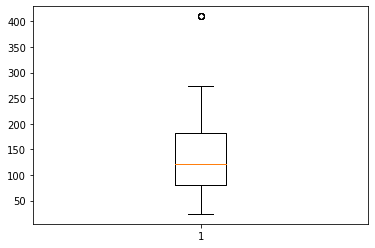

In [167]:
plt.boxplot(df['size'])

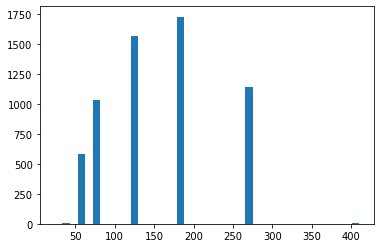

In [168]:
plt.hist(df['size'],bins=40)
plt.show()

### After analysing the data we draw the conclusion that we should remove images with size less than or equal to 54 and we will resize rest of the imagesto 100x100

In [169]:
new_df=df[df['size']>54]

In [170]:
new_df

,path,size
0,./data/cropped_images/male\male_0.png,182
1,./data/cropped_images/male\male_1.png,81
2,./data/cropped_images/male\male_1003.png,81
3,./data/cropped_images/male\male_1005.png,122
4,./data/cropped_images/male\male_1007.png,273
...,...,...
6053,./data/cropped_images/female\female_994.png,182
6054,./data/cropped_images/female\female_995.png,81
6055,./data/cropped_images/female\female_997.png,122
6056,./data/cropped_images/female\female_998.png,182


In [171]:
def gender(string):
    try:
        return string.split('\\')[0].split('/')[-1]
    except:
        return None

In [172]:
new_df['gender']=new_df['path'].apply(gender)

e:\image processing\image\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
new_df.tail()

,path,size,gender
6053,./data/cropped_images/female\female_994.png,182,female
6054,./data/cropped_images/female\female_995.png,81,female
6055,./data/cropped_images/female\female_997.png,122,female
6056,./data/cropped_images/female\female_998.png,182,female
6057,./data/cropped_images/female\female_999.png,182,female


In [174]:
new_df['gender'].value_counts()


female    3259
male      2209
Name: gender, dtype: int64

female    0.596013
male      0.403987
Name: gender, dtype: float64
81


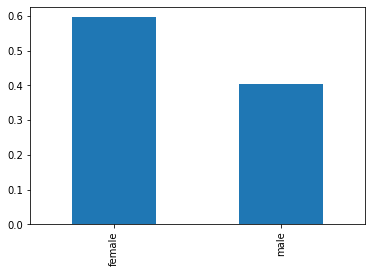

In [175]:
print(new_df['gender'].value_counts(normalize=True))
print(new_df['size'].min())
new_df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

### There are 60% female pics and rest 40% are male pics and all the image sizes are >=81. We wiil resize the image to 100x100 array

# RESIZE IMAGES TO 100X100

In [176]:
def resize_image(path):
    try:
       #Read image
        img=cv2.imread(path)
       #Convert image to grayscale
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
       #resize image to 100x100 array
        size=gray.shape[0]
        if size>=100:
            resize_gray=cv2.resize(gray,(100,100),cv2.INTER_AREA)
        else:
            resize_gray=cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
       #Flatten image
        return resize_gray.flatten()
    except:
        return None
    


In [177]:
new_df['resized_image']=new_df['path'].apply(resize_image)

e:\image processing\image\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
#Copy and expanding columns
d1=new_df['resized_image'].apply(pd.Series)
d1

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31
1,45,47,48,48,48,49,50,52,50,45,...,137,135,134,135,138,138,137,138,138,135
2,165,184,209,224,220,211,193,170,153,148,...,14,14,14,13,13,14,14,14,14,15
3,141,143,148,156,161,173,157,138,146,121,...,205,203,173,86,72,60,46,59,88,148
4,180,115,41,103,23,25,36,35,25,31,...,112,110,104,112,86,83,116,126,111,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6053,81,80,83,79,74,68,64,55,55,56,...,115,129,151,148,149,150,153,151,155,148
6054,21,25,30,33,34,33,34,38,42,47,...,32,35,26,12,2,3,4,2,0,1
6055,68,65,43,29,23,32,37,33,39,28,...,65,10,35,33,54,67,43,35,46,46
6056,187,188,190,194,199,202,203,203,204,204,...,72,60,60,48,52,60,46,45,41,49


In [180]:
d2=pd.concat((new_df['gender'],d1),axis=1)

In [181]:
d2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
1,male,45,47,48,48,48,49,50,52,50,...,137,135,134,135,138,138,137,138,138,135
2,male,165,184,209,224,220,211,193,170,153,...,14,14,14,13,13,14,14,14,14,15
3,male,141,143,148,156,161,173,157,138,146,...,205,203,173,86,72,60,46,59,88,148
4,male,180,115,41,103,23,25,36,35,25,...,112,110,104,112,86,83,116,126,111,113


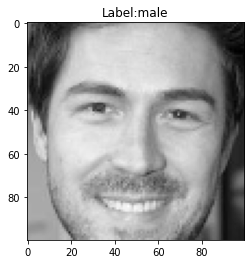

In [184]:
plt.imshow(d2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label:"+d2.loc[0]['gender'])
plt.show()

# Saving Dataframe

In [185]:
import pickle

In [186]:
pickle.dump(d2,open('./data/resized_images.pickle','wb'))